In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_euca_lsa.csv")

In [3]:
df_knn

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Eucalyptol
0,2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0.0
1,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
2,6,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,6,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,8,0.158467,0.230093,0.240255,-0.230257,-0.280443,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42956,0.038338,0.015059,-0.011836,-0.010530,-0.029754,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74996,42956,0.038338,0.015059,-0.011836,-0.010530,-0.029754,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74997,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
74998,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [4]:
df_knn.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_knn.drop(['X..Eucalyptol', 'index'], axis = 1)
y = df_knn[['X..Eucalyptol']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

<AxesSubplot:ylabel='Count'>

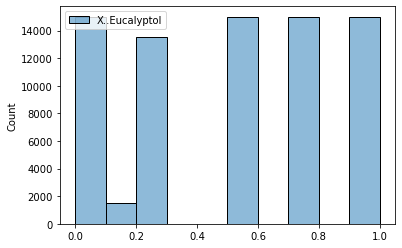

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [11]:
mean_absolute_error(y_val, y_pred_knreg)

0.04503962962962959

In [12]:
mean_squared_error(y_val, y_pred_knreg)

0.02535580766795722

In [13]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.15923507047116606

In [14]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8924075401400197

In [15]:
#val
r2_score(y_val, y_pred_knreg)

0.8002829135016647

Residual plots for each target variable

Feature Selection

In [16]:
rfreg = RandomForestRegressor()

In [17]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [18]:
selector.estimator_.feature_importances_

array([8.24938307e-02, 7.15467943e-02, 7.89882575e-02, 1.03889255e-01,
       9.08064784e-02, 3.70185968e-02, 6.70800669e-02, 9.35713895e-03,
       1.30222916e-04, 2.64664894e-03, 3.85717197e-03, 0.00000000e+00,
       8.07484206e-03, 1.02512754e-04, 3.20816662e-03, 5.19429134e-03,
       7.66502995e-03, 6.59783287e-03, 0.00000000e+00, 9.70483879e-03,
       0.00000000e+00, 0.00000000e+00, 5.87408942e-03, 7.88568574e-03,
       8.18697492e-03, 2.72937072e-03, 5.92814758e-03, 1.29977162e-04,
       0.00000000e+00, 2.40531483e-03, 1.06736399e-02, 0.00000000e+00,
       5.53027224e-03, 0.00000000e+00, 0.00000000e+00, 5.14751022e-03,
       4.11352306e-03, 7.54552007e-03, 1.86120993e-03, 1.44831021e-03,
       9.07808995e-04, 7.43182406e-03, 2.01884303e-03, 8.89476269e-03,
       2.75341564e-04, 4.51384358e-03, 1.90302918e-03, 3.45839240e-04,
       7.73671567e-03, 1.61628819e-03, 1.41689357e-01, 1.33058780e-02,
       4.50265952e-03, 9.95050767e-04, 4.10525792e-03, 1.05529646e-03,
      

In [19]:
selector.threshold_

0.011627906976744186

In [20]:
mask = selector.get_support()

In [21]:
mask

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [22]:
selected_features = X.columns[mask]

In [23]:
selected_X = df_knn[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,diesel,earthy,lemon
0,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,0
1,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,0
2,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,0
3,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,0
4,0.158467,0.230093,0.240255,-0.230257,-0.280443,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
74995,0.038338,0.015059,-0.011836,-0.010530,-0.029754,0,1,0,0,0
74996,0.038338,0.015059,-0.011836,-0.010530,-0.029754,0,1,0,0,0
74997,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,0
74998,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,0


In [24]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'diesel',
 'earthy',
 'lemon']

In [25]:
import joblib

joblib.dump(selected_X, "selected_X_knn_lsa_elbow_euca.pkl")
joblib.dump(selector, "selector_knn_lsa_elbow_euca.pkl")

['selector_knn_lsa_elbow_euca.pkl']

Train test split (after Feature Selection)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [27]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [28]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [29]:
mean_absolute_error(y_val, y_pred_knreg)

0.04445961538461534

In [30]:
mean_squared_error(y_val, y_pred_knreg)

0.024097055117247402

In [31]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.1552322618441392

In [32]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8840802815862671

In [33]:
#val
r2_score(y_val, y_pred_knreg)

0.8092126717324318

Hyperparameter Tuning

In [34]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [35]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [36]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [37]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [54]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [55]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.03289880660842467

In [56]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.1363289248612369

In [57]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9847580311060868

In [58]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.852849556714173

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [59]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [60]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_lsa_elbow_euca.pkl")
joblib.dump(y_test, "y_test_knreg_lsa_elbow_euca.pkl")

['y_test_knreg_lsa_elbow_euca.pkl']

In [61]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.032583045660699236

In [62]:
mean_squared_error(y_test, y_pred_knreg_test)

0.018643091505469403

In [63]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.13653970669907492

In [64]:
r2_score(y_test, y_pred_knreg_test)

0.8515645036103485

In [65]:
y_test

,X..Eucalyptol
11591,0.50
52020,0.75
34666,0.25
22169,1.00
23049,1.00
...,...
60863,0.00
32316,0.25
60933,0.50
43206,0.25


In [66]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

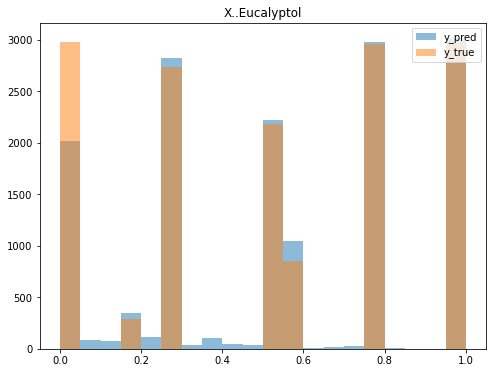

<Figure size 432x288 with 0 Axes>

In [67]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Eucalyptol"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_lsa_elbow_euca.png')

Pearson R

In [68]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.926
P-value: 0.000


<AxesSubplot:>

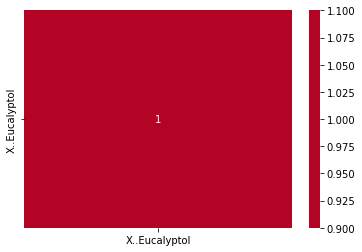

In [69]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)